In [ ]:
import os
import requests
from dotenv import load_dotenv

#  Load API Key
load_dotenv()
NEBIUS_API_KEY = os.getenv("NEBIUS_API_KEY")

if not NEBIUS_API_KEY:
    print(" Nebius API key is missing. Please set it in the .env file.")
    exit()

#  Set the correct Nebius API endpoint
API_BASE_URL = "https://api.studio.nebius.ai/v1/chat/completions"

#  Prepare request headers
headers = {
    "Authorization": f"Bearer {NEBIUS_API_KEY}",
    "Content-Type": "application/json"
}

#  Prepare request payload
payload = {
    "model": "meta-llama/Meta-Llama-3.1-70B-Instruct",  # Ensure this model exists
    "messages": [{"role": "user", "content": "Test connection to Nebius API"}],
    "temperature": 0.6
}

#  Send the request
try:
    response = requests.post(API_BASE_URL, json=payload, headers=headers)

    if response.status_code == 200:
        print(" Nebius API is working!")
        print(response.json())
    else:
        print(f" Nebius API Error: {response.status_code} - {response.text}")

except requests.exceptions.RequestException as e:
    print(f" Connection Error: {e}")


✅ Nebius API is working!
{'id': 'chatcmpl-4a171225dc8d40ca9b9266ae0ef9deb0', 'choices': [{'finish_reason': 'stop', 'index': 0, 'logprobs': None, 'message': {'content': 'To test a connection to the Nebius API, you would typically follow these steps. Please note that the specifics may vary depending on the version of the API you are using and the programming language or method you choose for the connection. Nebius is known for its knowledge management and information retrieval capabilities, often used in various industries for its AI-driven solutions.\n\n### Prerequisites:\n1. **API Key or Credentials**: You should have a valid API key or credentials provided by Nebius. This is crucial for authenticating your API requests.\n2. **API Documentation**: Familiarize yourself with the Nebius API documentation to understand the correct endpoint URLs, request methods (e.g., GET, POST), and any specific headers or parameters required.\n3. **Programming Environment**: Choose a programming language

In [ ]:
import pandas as pd

# Load Data
articles_file = "files/articles.xlsx"

# Read Excel file
articles = pd.read_excel(articles_file, engine="openpyxl")

# Standardize column names
articles.columns = articles.columns.str.strip().str.lower()

# Check available columns
print("Available Columns:", articles.columns.tolist())

# If "Abstract" column exists, filter AI-related research
if "title" in articles.columns and "abstract" in articles.columns:
    # Select only AI trustworthiness in education-related papers
    ai_trust_papers = articles[
        articles["title"].str.contains("AI trust|Artificial Intelligence trust|trustworthiness", case=False, na=False) |
        articles["abstract"].str.contains("AI trust|Artificial Intelligence trust|trustworthiness", case=False, na=False)
    ]

    print(f" Found {len(ai_trust_papers)} research papers on AI Trust in Education.")

    # Save filtered data to CSV for review
    ai_trust_papers.to_csv("ai_trust_education.csv", index=False)

else:
    print(" No 'title' or 'abstract' column found in the dataset.")


Available Columns: ['article id', 'title', 'no. of authors', 'year published', 'type', 'journal/book title', 'abstract', 'keywords']
✅ Found 27 research papers on AI Trust in Education.


In [ ]:
import os
import requests
from dotenv import load_dotenv

#  Load API Key
load_dotenv()
NEBIUS_API_KEY = os.getenv("NEBIUS_API_KEY")

if not NEBIUS_API_KEY:
    print(" Nebius API key is missing. Please set it in the .env file.")
    exit()

#  Set the correct Nebius API endpoint
API_BASE_URL = "https://api.studio.nebius.ai/v1/chat/completions"

#  Prepare request headers
headers = {
    "Authorization": f"Bearer {NEBIUS_API_KEY}",
    "Content-Type": "application/json"
}

#  Load AI Trustworthiness Research Data
df = pd.read_csv("ai_trust_education.csv")

#  Prepare research content for AI analysis
research_data = "\n".join(df["abstract"].fillna("").tolist()[:5])  # Limit to 5 papers

#  Generate Prompt for Nebius AI
prompt = f"""
You are an AI research analyst. Analyze the following research abstracts on AI Trustworthiness in Education:

{research_data}

Provide:
1. The main challenges of AI trust in education.
2. Key trends in AI trustworthiness.
3. Future research opportunities in this area.
"""

#  Prepare request payload
payload = {
    "model": "meta-llama/Meta-Llama-3.1-70B-Instruct",
    "messages": [{"role": "user", "content": prompt}],
    "temperature": 0.6
}

#  Send the request
try:
    response = requests.post(API_BASE_URL, json=payload, headers=headers)

    if response.status_code == 200:
        print(" AI Research Analysis Completed!")
        ai_response = response.json()
        print("\n Nebius AI Analysis:\n")
        print(ai_response["choices"][0]["message"]["content"])
    else:
        print(f" Nebius API Error: {response.status_code} - {response.text}")

except requests.exceptions.RequestException as e:
    print(f" Connection Error: {e}")


✅ AI Research Analysis Completed!

📊 Nebius AI Analysis:

Based on the provided abstracts, here are the answers to your questions:

**1. Main challenges of AI trust in education:**

* Lack of transparency and understanding of AI decision-making processes
* Insufficient consideration of user experiences and perceptions of AI trustworthiness
* Limited research on the ethical challenges of big data, AI, and learning analytics in education
* Vulnerability of AI systems to imperceptible attacks, biases, and lack of user privacy protection
* Need for a comprehensive and interdisciplinary approach to address trust dynamics in socio-technical contexts
* Difficulty in balancing the benefits of AI with the potential risks and dangers, particularly in high-stakes applications such as career guidance

**2. Key trends in AI trustworthiness:**

* Growing recognition of the importance of transparency, explainability, and accountability in AI systems
* Increasing focus on the need for a human-centered

✅ Co-Authorship Network Created: 284 authors, 703 collaborations.


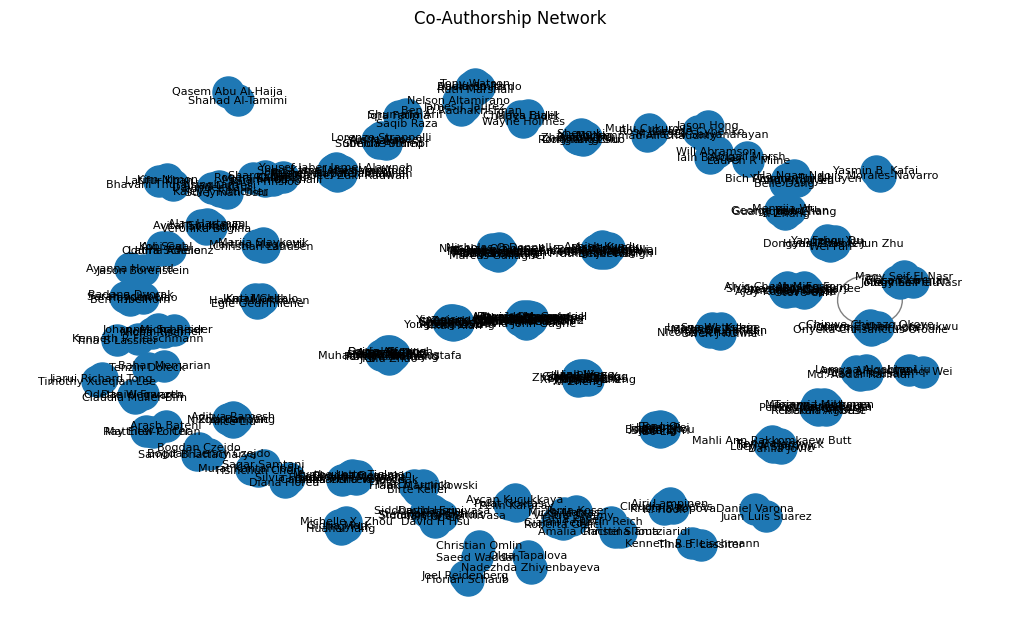

In [38]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 🔹 Load Data
articles_file = "files/articles.xlsx"
authors_file = "files/authors.xlsx"

# Read Excel files
articles = pd.read_excel(articles_file, engine="openpyxl")
authors = pd.read_excel(authors_file, engine="openpyxl")

# 🔹 Standardize Column Names
articles.columns = articles.columns.str.strip().str.lower()
authors.columns = authors.columns.str.strip().str.lower()

# 🔹 Create Co-Authorship Network
G = nx.Graph()

# Group authors by article
for article_id, group in authors.groupby("article id"):
    author_list = group["author name"].tolist()
    for i in range(len(author_list)):
        for j in range(i + 1, len(author_list)):
            if G.has_edge(author_list[i], author_list[j]):
                G[author_list[i]][author_list[j]]["weight"] += 1
            else:
                G.add_edge(author_list[i], author_list[j], weight=1)

print(f"✅ Co-Authorship Network Created: {len(G.nodes)} authors, {len(G.edges)} collaborations.")

# 🔹 Visualize the Co-Authorship Network
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=500, font_size=8, edge_color="gray")
plt.title("Co-Authorship Network")
plt.show()

# ✅ Extract key insights from the network
most_connected_keywords = sorted(G.degree, key=lambda x: x[1], reverse=True)[:10]  # Top 10 most connected keywords
largest_clusters = list(nx.connected_components(G))[:5]  # Get top 5 clusters

# ✅ Convert network structure into text
network_summary = f"""
This is a keyword co-occurrence network extracted from research papers.

- Total Keywords: {len(G.nodes)}
- Total Connections: {len(G.edges)}

- 🔥 Top 10 Most Central Keywords:
{', '.join([f"{word} ({degree})" for word, degree in most_connected_keywords])}

- 📌 Sample Keyword Clusters:
{largest_clusters}

Analyze the structure and meaning of this network:
1️⃣ Identify major research themes.
2️⃣ Explain relationships between key terms.
3️⃣ Predict future research trends in this field.
"""


In [39]:
import os
import requests
from dotenv import load_dotenv

# ✅ Load API Key
load_dotenv()
NEBIUS_API_KEY = os.getenv("NEBIUS_API_KEY")

if not NEBIUS_API_KEY:
    print("❌ Nebius API key is missing. Please set it in the .env file.")
    exit()

# ✅ Set Nebius API endpoint
API_BASE_URL = "https://api.studio.nebius.ai/v1/chat/completions"

# ✅ Prepare request headers
headers = {
    "Authorization": f"Bearer {NEBIUS_API_KEY}",
    "Content-Type": "application/json"
}

# ✅ Prepare request payload
payload = {
    "model": "meta-llama/Meta-Llama-3.1-70B-Instruct",
    "messages": [{"role": "user", "content": network_summary}],
    "temperature": 0.6
}

# ✅ Send request to Nebius AI
try:
    response = requests.post(API_BASE_URL, json=payload, headers=headers)

    if response.status_code == 200:
        print("✅ AI Network Analysis Completed!")
        ai_response = response.json()
        print("\n📊 Nebius AI Analysis:\n")
        print(ai_response["choices"][0]["message"]["content"])
    else:
        print(f"❌ Nebius API Error: {response.status_code} - {response.text}")

except requests.exceptions.RequestException as e:
    print(f"❌ Connection Error: {e}")


✅ AI Network Analysis Completed!

📊 Nebius AI Analysis:

Based on the provided keyword co-occurrence network, I'll analyze the structure and meaning of this network.

**1. Major Research Themes:**

The network consists of 284 keywords connected by 703 edges, indicating a relatively dense network. The top 10 most central keywords are all researchers' names, which might indicate that the network is centered around authors rather than topics. However, by analyzing the sample keyword clusters, we can identify some research themes:

* **Cluster 1:** Kaley J. Rittichier, Davinder Kaur, Suleyman Uslu, and Arjan Durresi might be related to **Computer Science**, **Networking**, or **Cybersecurity**, given their research backgrounds.
* **Cluster 2:** Ismail Celik, Egle Gedrimiene, Kati Makitalo, and Hanni Muukkonen could be connected to **Education**, **Learning Sciences**, or **Human-Computer Interaction**, based on their research interests.
* **Cluster 3:** Jingyi Li, Huahai Yang, Michelle X. 

In [ ]:
import os
import pandas as pd
import networkx as nx
import requests
from dotenv import load_dotenv

# ✅ Load API Key from .env file
load_dotenv()
NEBIUS_API_KEY = os.getenv("NEBIUS_API_KEY")

if not NEBIUS_API_KEY:
    print("❌ Nebius API key is missing. Please set it in the .env file.")
    exit()

# ✅ Set Nebius API endpoint
API_BASE_URL = "https://api.studio.nebius.ai/v1/chat/completions"

# ✅ Load Data
articles_file = "files/articles.xlsx"
try:
    articles = pd.read_excel(articles_file, engine="openpyxl")
    print("✅ Articles data loaded successfully.")
except Exception as e:
    print(f"❌ Error loading articles file: {e}")
    exit()

# ✅ Standardize Column Names
articles.columns = articles.columns.str.strip().str.lower()

# ✅ Ensure 'Keywords' column exists
if "keywords" not in articles.columns:
    print("❌ 'Keywords' column not found in articles data.")
    exit()

# ✅ Create Keyword Co-Occurrence Network
G = nx.Graph()

for _, row in articles.iterrows():
    keywords = str(row["keywords"]).replace(",", ";").split(";")
    keywords = [k.strip().lower() for k in keywords if k.strip()]
    
    for i in range(len(keywords)):
        for j in range(i + 1, len(keywords)):
            if G.has_edge(keywords[i], keywords[j]):
                G[keywords[i]][keywords[j]]["weight"] += 1
            else:
                G.add_edge(keywords[i], keywords[j], weight=1)

print(f"✅ Keyword Co-Occurrence Network Created: {len(G.nodes)} keywords, {len(G.edges)} connections.")

# ✅ Extract key insights from the network
most_connected_keywords = sorted(G.degree, key=lambda x: x[1], reverse=True)[:10]  # Top 10 most connected keywords
largest_clusters = list(nx.connected_components(G))[:5]  # Get top 5 clusters

# ✅ Convert network structure into text for AI analysis
network_summary = f"""
This is a keyword co-occurrence network extracted from research papers.

- Total Keywords: {len(G.nodes)}
- Total Connections: {len(G.edges)}

- 🔥 Top 10 Most Central Keywords:
{', '.join([f"{word} ({degree})" for word, degree in most_connected_keywords])}

- 📌 Sample Keyword Clusters:
{largest_clusters}

Analyze the structure and meaning of this network:
1️⃣ Identify major research themes.
2️⃣ Explain relationships between key terms.
3️⃣ Predict future research trends in this field.
"""

# ✅ Prepare request headers for Nebius AI
headers = {
    "Authorization": f"Bearer {NEBIUS_API_KEY}",
    "Content-Type": "application/json"
}

# ✅ Prepare request payload
payload = {
    "model": "meta-llama/Meta-Llama-3.1-70B-Instruct",
    "messages": [{"role": "user", "content": network_summary}],
    "temperature": 0.6
}

# ✅ Send request to Nebius AI
try:
    response = requests.post(API_BASE_URL, json=payload, headers=headers)

    if response.status_code == 200:
        print("✅ AI Network Analysis Completed!")
        ai_response = response.json()
        print("\n📊 Nebius AI Analysis:\n")
        print(ai_response["choices"][0]["message"]["content"])
    else:
        print(f"❌ Nebius API Error: {response.status_code} - {response.text}")

except requests.exceptions.RequestException as e:
    print(f"❌ Connection Error: {e}")
